In [103]:
from sklearn.datasets import load_iris
from scipy.stats import skew
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

##  Description du jeu de données

1. Combien y a-t-il d'observations ?
2. Combien de variables quantitatives sont mesurées ?
3. Que représente chaque ligne du tableau `X` ?

In [ ]:
# 1.
l, c = iris.data.shape
print(f"Nombre d'observations {l}")
# 2. 
print(f"Nombre de variables quantitatives {c}")

In [37]:
# 3. 
# chaque ligne représente une fleure avec quatre mesures 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Calculer la médiane de la longueur des pétales.

- Comparer moyenne et médiane.
- Que peut-on dire de la symétrie de la distribution ?

In [41]:
median_petal_length = np.median( X[:, 2] )
average_petal_length = np.mean( X[:, 2] )

In [40]:
median_petal_length

np.float64(4.35)

In [42]:
average_petal_length

np.float64(3.7580000000000005)

## Calculer les quartiles Q1, Q2, Q3 de la longueur des pétales.

1. Que représente l'intervalle [Q1 ; Q3] ?
1. Quelle proportion des données contient-il ?

L'interquartile où se trouve 50% de données et la médiane est à l'intérieur de cet intervalle.

## Dispersion

### Calculer :

1. l'étendue
1. l'écart-type
Puis répondre :

1. La dispersion est-elle faible ou forte ?
1. Pourquoi l'écart-type est-il plus pertinent que l'étendue ?

In [47]:
petal_length = X[: , 2]

In [49]:
petal_length[:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [50]:
range_petal_length = np.max(petal_length) - np.min( petal_length )

In [51]:
range_petal_length

np.float64(5.9)

In [82]:
for i in range(3):
    print(f"Specie {target_names[i]}")
    # valeur pour la première espèce puis on calcule l'étendue de length et la largeur 
    species = X[y == i]
    t = ['petal_length','petal_width', 'sepal_length', 'sepal_width']
    for j in range(4):
        r =  np.max(species[:, j]) - np.min( species[:, j] )
        print(f"{t[j]} range = {r}")
        # ecart type 
        print(f"average={np.mean(species[:, j])} std={ species[:, j].std() }")
        print("----")
    print("---------------------------------")

Specie setosa
petal_length range = 1.5
average=5.006 std=0.3489469873777391
----
petal_width range = 2.1000000000000005
average=3.428 std=0.37525458025186054
----
sepal_length range = 0.8999999999999999
average=1.4620000000000002 std=0.17191858538273283
----
sepal_width range = 0.5
average=0.24599999999999997 std=0.1043264108459598
----
---------------------------------
Specie versicolor
petal_length range = 2.0999999999999996
average=5.936 std=0.5109833656783751
----
petal_width range = 1.4
average=2.7700000000000005 std=0.31064449134018135
----
sepal_length range = 2.0999999999999996
average=4.26 std=0.4651881339845203
----
sepal_width range = 0.8
average=1.3259999999999998 std=0.19576516544063705
----
---------------------------------
Specie virginica
petal_length range = 3.0
average=6.587999999999998 std=0.6294886813914926
----
petal_width range = 1.5999999999999996
average=2.974 std=0.3192553836664309
----
sepal_length range = 2.4000000000000004
average=5.5520000000000005 std=0.54

In [74]:
# l'écart type pour les petales
petal_length = X[: , 2]
print(f"std petal={petal_length.std()}")

 std petal=1.759404065775303


In [84]:
print( (petal_length.std()/range_petal_length)*100)
print(range_petal_length)

29.820407894496658
5.9


## Boxplot
### Tracer le diagramme en boîte de la longueur des pétales.

1. Où se situe la médiane ?
1. La boîte est-elle large ou étroite ?
1. Observe-t-on des valeurs atypiques ?


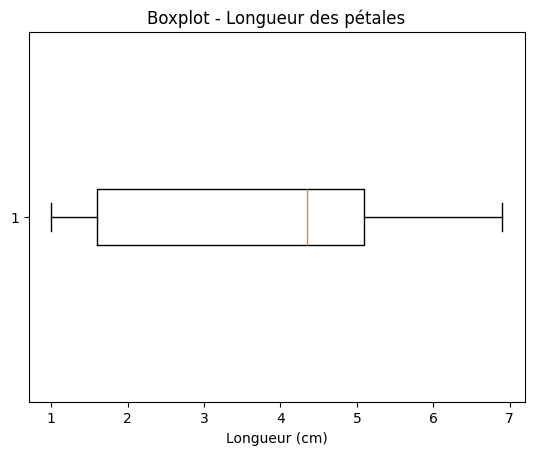

In [101]:
plt.figure()
plt.boxplot(petal_length, vert=False)
plt.title("Boxplot - Longueur des pétales")
plt.xlabel("Longueur (cm)")
plt.show()

In [106]:
print( "asymétrie à gauche" if skew(petal_length) < 0 else "asymértie à droite" )

"""
médiane centrée → distribution plutôt symétrique
médiane proche de Q1 → asymétrie à droite
médiane proche de Q3 → asymétrie à gauche
"""

print()

asymétrie à gauche



In [90]:
# Détection des valeurs atypiques par le calcul (voir le cours)

mu_pl = petal_length.mean()
sigma_pl = petal_length.std()

petal_length[ np.abs( petal_length - mu_pl ) > 2*sigma_pl ]

array([], dtype=float64)

0.3117530585022963
asymértie à droite


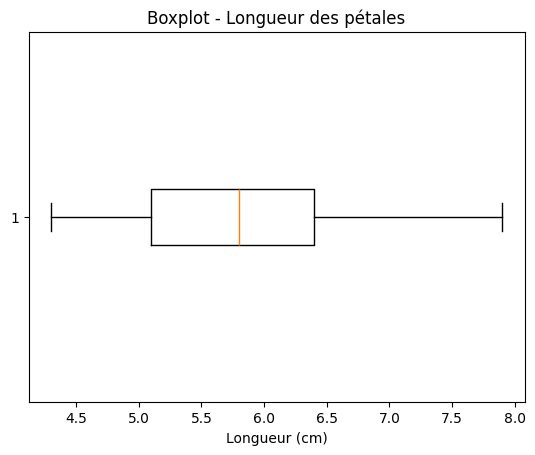

In [108]:
sepal_length = X[:, 0]
print(skew(sepal_length))
print( "asymétrie à gauche" if skew(sepal_length) < 0 else "asymértie à droite" )


plt.figure()
plt.boxplot(sepal_length, vert=False)
plt.title("Boxplot - Longueur des pétales")
plt.xlabel("Longueur (cm)")
plt.show()

In [93]:
mu_sl = sepal_length.mean()
sigma_sl = sepal_length.std()

sepal_length[ np.abs( sepal_length - mu_sl ) > 2*sigma_sl ]

array([7.6, 7.7, 7.7, 7.7, 7.9, 7.7])

In [94]:
len(sepal_length  )

150

In [97]:
100 * sigma_sl / (np.max(sepal_length) - np.min(sepal_length) )

np.float64(22.925035882920575)

In [99]:
150*.25

37.5

In [100]:
"""
moustache droite plus longue → asymétrie à droite
moustache gauche plus longue → asymétrie à gauche
"""

print()

In [110]:
# b) Méthode des quartiles
Q1 = np.percentile(petal_length, 25)
Q2 = np.percentile(petal_length, 50)
Q3 = np.percentile(petal_length, 75)

IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_iqr = petal_length[(petal_length < lower) | (petal_length > upper)]

print("=== Valeurs atypiques – Méthode des quartiles ===")
print("Nombre de valeurs détectées :", len(outliers_iqr))
print("→ Les valeurs détectées correspondent aux points isolés du boxplot.\n")

=== Valeurs atypiques – Méthode des quartiles ===
Nombre de valeurs détectées : 0
→ Les valeurs détectées correspondent aux points isolés du boxplot.



In [113]:
# Centrer et réduire la longueur des pétales

mu_pl = petal_length.mean()
sigma_pl = petal_length.std()

petal_length_cr = (petal_length - mu_pl) / sigma_pl

# petal_length_cr > 2 # 2 écarts types par rapport à 0 

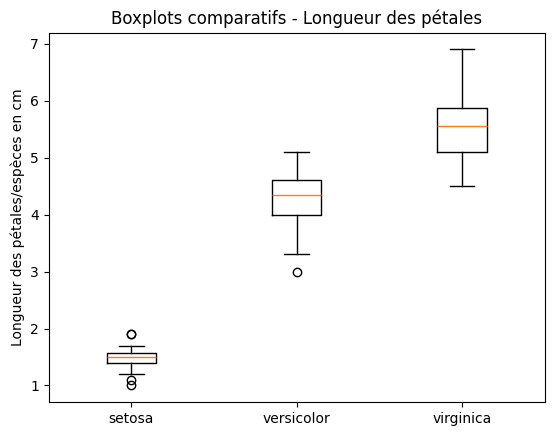

In [121]:
# Les box plot

plt.boxplot([  petal_length[y == 0], petal_length[y == 1],petal_length[y == 2] ], tick_labels=iris.target_names)

plt.ylabel("Longueur des pétales/espèces en cm")
plt.title("Boxplots comparatifs - Longueur des pétales")
plt.show()

In [124]:
# Rappel sur la notion de masque
numbers = np.array([11,12, 13, 21, 22, 23, 31,32, 33])

In [128]:
z = np.array([ 0, 0, 0, 1, 1, 1, 2, 2, 2 ])

In [126]:
z == 0

array([ True,  True,  True, False, False, False, False, False, False])

In [127]:
numbers[z == 0 ]

array([11, 12, 13])

In [129]:
numbers[z == 1 ]

array([21, 22, 23])

In [130]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [136]:
matrix = np.array( [ [1, 2, 3], [11, 12, 13],  [ 21, 22, 23], [221, 222, 223],  [ 31, 32, 33 ], [331, 332, 333] ] )

In [137]:
t = np.array( [ 1, 1, 2, 2, 3, 3 ] )
matrix.shape

(6, 3)

In [135]:
t == 1
t.shape

(6,)

In [138]:
matrix[ t == 1 ]

array([[ 1,  2,  3],
       [11, 12, 13]])